<a href="https://colab.research.google.com/github/Found-Bugs/Pembelajaran-Mesin/blob/Convolutional-Neural-Network/Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
# Load dataset LFW
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
images = lfw_dataset.images
labels = lfw_dataset.target
label_names = lfw_dataset.target_names

# Normalisasi gambar
images = images / 255.0
images = np.expand_dims(images, axis=-1)  # Tambahkan channel untuk input CNN

# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [15]:
# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=40,  # Rotasi gambar hingga 40 derajat
    width_shift_range=0.3,  # Geser gambar hingga 30% lebar gambar
    height_shift_range=0.3,  # Geser gambar hingga 30% tinggi gambar
    shear_range=0.3,  # Shear gambar hingga 30%
    zoom_range=0.3,  # Zoom gambar hingga 30%
    horizontal_flip=True,  # Pembalikan gambar secara horizontal
    vertical_flip=True,  # Pembalikan gambar secara vertikal
    fill_mode='nearest',  # Isi area kosong setelah transformasi
    brightness_range=[0.2, 1.8],  # Variasi kecerahan gambar
    channel_shift_range=40.0,  # Variasi channel warna
)

datagen.fit(X_train)

In [16]:
# Membuat model CNN yang lebih sederhana
model = models.Sequential([
    # Layer Konvolusi pertama dengan 32 filter dan kernel 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),  # Max Pooling untuk mengurangi dimensi

    # Layer Konvolusi kedua dengan 64 filter dan kernel 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Max Pooling untuk mengurangi dimensi

    # Layer Konvolusi kedua dengan 64 filter dan kernel 3x3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Max Pooling untuk mengurangi dimensi

    # Layer Flatten untuk mengubah matriks menjadi vektor
    layers.Flatten(),

    # Dense layer untuk klasifikasi
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    layers.Dense(len(label_names), activation='softmax')  # Output layer untuk klasifikasi
])

# Menyusun model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Menampilkan ringkasan model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,357 (1.36 MB)

 Trainable params: 356,357 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Training model dengan augmentasi
batch_size = 32
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    steps_per_epoch=len(X_train) // batch_size)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4200 - loss: 1.6059 - val_accuracy: 0.4649 - val_loss: 1.5956
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4688 - loss: 1.5963 - val_accuracy: 0.4649 - val_loss: 1.5951
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4632 - loss: 1.5928 - val_accuracy: 0.4649 - val_loss: 1.5824
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 1.5687 - val_accuracy: 0.4649 - val_loss: 1.5819
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.4582 - loss: 1.5805 - val_accuracy: 0.4649 - val_loss: 1.5698
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 1.5740 - val_accuracy: 0.4649 - val_loss: 1.5693
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.4802 - loss: 1.5662 - val_accuracy: 0.4649 - val_loss: 1.5576
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 1.5431 - val_accuracy: 0.4649 - va

In [18]:
# Evaluasi performa model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

8/8 - 0s - 32ms/step - accuracy: 0.4649 - loss: 1.4244
Test Accuracy: 0.46


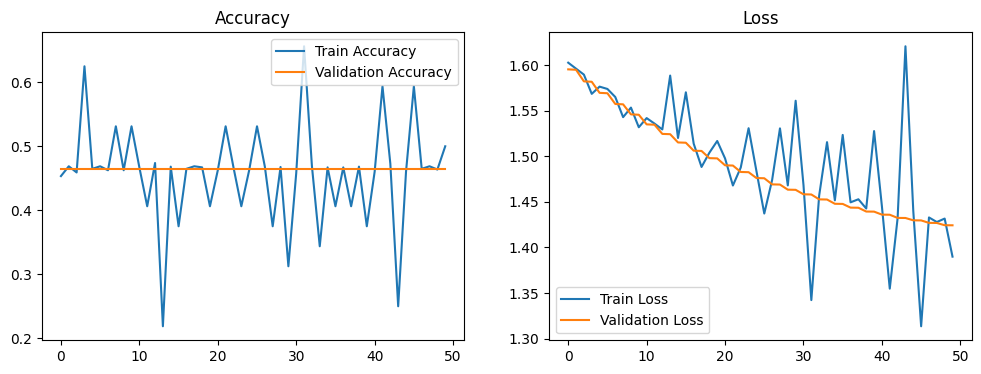

In [19]:
# Plot hasil training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()